![My Image](https://raw.githubusercontent.com/ralf-42/Image/main/genai-banner-2.jpg)

<p><font size="5" color='grey'> <b>
Multimodal - Bild
</b></font> </br></p>


---

In [2]:
#@title 🔧 Umgebung einrichten{ display-mode: "form" }
!uv pip install --system -q git+https://github.com/ralf-42/Python_Modules
from genai_lib.utilities import check_environment, get_ipinfo, setup_api_keys, mprint, install_packages
setup_api_keys(['OPENAI_API_KEY', 'HF_TOKEN'], create_globals=False)
print()
check_environment()
print()
get_ipinfo()
# Bei Bedarf: Trennen zwischen Installationsname () und Importname (für Python) beide Angaben in Klammern
# install_packages([('markitdown[all]', 'markitdown'), 'langchain_chroma', ]

✓ OPENAI_API_KEY erfolgreich gesetzt
✓ HF_TOKEN erfolgreich gesetzt

Python Version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]

Installierte LangChain-Bibliotheken:
langchain                                0.3.27
langchain-community                      0.3.31
langchain-core                           0.3.78
langchain-experimental                   0.3.4
langchain-ollama                         0.3.10
langchain-openai                         0.3.35
langchain-text-splitters                 0.3.11

IP-Adresse: 34.143.213.205
Hostname: 205.213.143.34.bc.googleusercontent.com
Stadt: Singapore
Region: Singapore
Land: SG
Koordinaten: 1.2897,103.8501
Provider: AS396982 Google LLC
Postleitzahl: 018989
Zeitzone: Asia/Singapore


In [ ]:
#@title 🛠️ Installationen { display-mode: "form" }
install_packages(['ultralytics', ])



# 1 | Einführung
---

Dieses Modul beschäftigt sich mit der Analyse von Bildern und ihrer Rolle als Basis für multimodale Systeme. Solche Modelle stellen einen bedeutenden Fortschritt in der KI dar, da sie geschriebene Sprache in visuelle Darstellungen umwandeln. Bekannte Beispiele wie DALL·E, Midjourney und Stable Diffusion nutzen Deep-Learning-Techniken, um detaillierte Bilder auf Grundlage von Textbeschreibungen zu erzeugen. Dabei erfassen sie die Zusammenhänge zwischen sprachlichen und visuellen Elementen, wodurch sie in der Lage sind, Szenen, Objekte und Konzepte entsprechend der gegebenen Beschreibung zu generieren.  

Multimodale Modelle gehen über diese Funktionalität hinaus, indem sie mehrere Datenquellen kombinieren – in der Regel Text,  Bilder, Audio oder Video. Ihr Ziel ist es, verschiedene Informationsarten simultan zu verarbeiten und in Beziehung zu setzen. So können sie beispielsweise Bildbeschreibungen aus Text erstellen, Fragen zu visuellen Inhalten beantworten oder sogar Videos auf Basis von Texteingaben generieren. Durch die Verbindung der Fähigkeiten von Text- und Bildmodellen erweitern multimodale Systeme das Anwendungsspektrum der KI und ermöglichen eine flexiblere, kontextbezogene Interaktion.  

Während **Text-zu-Bild-Modelle** primär darauf ausgerichtet sind, sprachliche Eingaben in visuelle Inhalte umzusetzen, ermöglichen **multimodale Modelle** eine komplexere Verknüpfung verschiedener Medientypen. In diesem Modul wird untersucht, wie diese Modelle funktionieren und wie ihre Architektur die Entwicklung weiterführender multimodaler Systeme beeinflusst. Zudem werden praxisnahe Anwendungsfälle betrachtet sowie mögliche zukünftige Entwicklungen aufgezeigt, die sich aus der Kombination unterschiedlicher Datenmodalitäten ergeben.

OpenAI bietet mit DALL·E und GPT Image 1 zwei fortschrittliche KI-Modelle zur Bildgenerierung an. Beide Modelle wandeln Texteingaben in Bilder um, unterscheiden sich jedoch in ihren Funktionen und Einsatzmöglichkeiten.



<p><font color='black' size="5">
DALL·E
</font></p>

- **Funktion:** Generiert Bilder aus Textbeschreibungen.
- **Stilvielfalt:** Von realistisch bis abstrakt, viele Motive und Stile möglich.
- **API-Zugriff:** Über die OpenAI-API leicht in Webanwendungen, Apps und Plattformen integrierbar.
- **Anwendungsbereiche:** Design, Marketing, Unterhaltung, Bildung.
- **Vorteil:** Schnelle und kreative Visualisierung von Ideen.


<p><font color='black' size="5">
GPT Image 1
</font></p>

- **Funktion:** Modernes, multimodales Bildmodell – verarbeitet sowohl Text- als auch Bildeingaben.
- **Bildbearbeitung:** Unterstützt gezielte Bildbearbeitung (z. B. Inpainting, Kombination mehrerer Bilder).
- **Flexible Steuerung:** Nutzer können Parameter wie Bildgröße, Qualität und Hintergrundtyp anpassen.
- **Integration:** Über API in verschiedene Plattformen (z. B. Figma, Adobe) einbindbar.
- **Sicherheit:** Moderation und Kennzeichnung der generierten Bilder durch C2PA-Metadaten.
- **Anwendungsbereiche:** Besonders geeignet für professionelle Kreativ- und Content-Workflows.



<p><font color='red' size="4">
<b>Hinweis</b>
</font></p>

Das Modell gpt-image-1 kann nur von verifizierten Organisationen genutzt werden, weil OpenAI damit die Nutzung gezielt kontrollieren und Missbrauch verhindern möchte. Hintergrund ist, dass gpt-image-1 besonders realistische und detaillierte Bilder erzeugen kann. Damit steigt das Risiko, dass das Modell für problematische Zwecke wie Deepfakes, Falschinformationen oder unangemessene Inhalte eingesetzt wird.

**Fazit:**  
DALL·E eignet sich ideal für die schnelle Umsetzung von Bildideen aus Text. GPT Image 1 bietet darüber hinaus erweiterte Möglichkeiten zur Bildbearbeitung und -kombination und ist besonders für professionelle Anwendungen interessant.

| **Kriterium**         | **DALL·E 3**                                                                 | **GPT Image** (z. B. GPT-4o)                                                                            |
|-----------------------|------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------|
| **Bildgenerierung**   | Mehrere Bilder aus Textbeschreibungen, hohe Prompt-Adhärenz                  | Bilder aus Text und/oder Bildeingaben (multimodal), realistische Licht- und Schatteneffekte             |
| **Auflösungen**       | 256×256, 512×512, 1024×512, 1024×1024, 1024×1792, 1792×1024                  | Ähnliche Formate wie DALL·E 3, flexibel über die API auswählbar                                         |
| **Qualitätsstufen**   | Standard, HD                                                                 | Standard, HD                                                                                            |
| **Nutzererfahrung**   | Über ChatGPT oder API, einfache Bedienung, bis zu 10 Bilder pro Anfrage      | Über API oder ChatGPT, dialogorientiert, kombiniert Text- und Bildeingaben                              |
| **Anwendungsbereiche**| Design, Marketing, Illustration, Bildung, kreative Projekte                  | Professionelle Kreativ-Workflows, Content-Produktion, Design, Werbung, künstlerische Projekte           |
| **Besonderheiten**    | Sehr gute Textumsetzung im Bild, schnelle Integration, API-Anbindung         | Multimodal (Text & Bild), fortschrittliche Bildbearbeitung (z. B. Inpainting), C2PA-Metadaten, Moderation|


# 2 | Übersicht Bildverarbeitung
---

| **Kategorie**                        | **Aufgabe**                      | **Beschreibung**                                                                      |
| ------------------------------------ | -------------------------------- | ------------------------------------------------------------------------------------- |
| 🧠 **Analyse & Klassifikation**      | **Bildklassifikation**           | Zuordnung eines Bildes zu vordefinierten Klassen (z. B. Katze, Hund, Auto).           |
|                                      | **Objekterkennung**                  | Erkennung und Lokalisierung mehrerer Objekte in einem Bild mit Bounding Boxes.        |
|                                      | Bildsegmentierung                | Pixelgenaue Zuordnung von Bildbereichen zu Klassen (z. B. Straße, Baum, Mensch).      |
|                                      | Gesichtserkennung                | Identifikation oder Verifikation von Personen auf Bildern.                            |
|                                      | Emotionserkennung                | Analyse der Gesichtsausdrücke zur Einschätzung von Emotionen.                         |
|                                      | Anomalieerkennung                | Erkennung ungewöhnlicher oder fehlerhafter Bildinhalte (z. B. Produktionsfehler).     |
| 📝 **Generierung & Transformation**  | **Bildgenerierung**              | Erzeugung synthetischer Bilder, z. B. aus Text (Text-to-Image) oder Rauschen.         |
|                                      | Bild-zu-Bild-Übersetzung         | Umwandlung von Bildern (z. B. Skizze → Foto, Tag → Nacht).                            |
|                                      | Stiltransfer                     | Übertragung des Stils eines Bildes auf ein anderes (z. B. Van Gogh → Foto).           |
|                                      | Super-Resolution                 | Hochskalierung von Bildern mit künstlicher Detailschärfung.                           |
|                                      | Bildrestauration                 | Entfernung von Rauschen, Kratzern oder Artefakten in alten oder beschädigten Bildern. |
|                                      | Colorisierung                    | Umfärben von Schwarzweiß-Bildern mit realistischen Farben.                            |
| 🧩 **Ergänzung & Vervollständigung** | **Inpainting**                       | Auffüllen fehlender oder beschädigter Bildbereiche.                                   |
|                                      | **Bildvervollständigung**        | Vorhersage fehlender Bildbereiche basierend auf Kontext.                              |
|                                      | Hintergrundentfernung            | Trennung des Vordergrundobjekts vom Hintergrund.                                      |
| 📚 **Informationsgewinnung**         | Texterkennung (OCR)              | Erkennung und Extraktion von Text aus Bildern.                                        |
|                                      | Schrifterkennung                 | Identifikation von Schriftarten oder Handschriften.                                   |
|                                      | **Bildbeschreibung (Captioning)**    | Automatische Erzeugung eines beschreibenden Textes zu einem Bild.                     |
|                                      | visuelle Fragebeantwortung (VQA) | Beantwortung von Fragen basierend auf einem Bildinhalt.                               |
| 🛡️ **Sicherheit & Strukturierung**  | Deepfake-Erkennung               | Analyse, ob ein Bild manipuliert oder synthetisch erzeugt wurde.                      |
|                                      | Gesichtsverpixelung              | Anonymisierung durch Unkenntlichmachung von Gesichtern.                               |
|                                      | Wasserzeichen-Erkennung          | Detektion sichtbarer oder unsichtbarer Wasserzeichen.                                 |
|                                      | Formatkonvertierung              | Umwandlung zwischen Bildformaten (z. B. PNG ↔ JPG).                                   |



# 3 | Bildgenerierung
---

Die Bildgenerierung mit Künstlicher Intelligenz (KI) ermöglicht es, aus einfachen Texteingaben oder bestehenden Bildern völlig neue, realistische oder kreative Grafiken zu erstellen. Moderne KI-Modelle wie DALL·E 3 und GPT Image von OpenAI setzen dabei auf fortschrittliche Algorithmen, die Texte präzise interpretieren und in beeindruckende visuelle Darstellungen umsetzen. Diese Technologie findet Anwendung in vielen Bereichen – von Design und Marketing über Kunst bis hin zur Bildung – und eröffnet neue kreative Möglichkeiten für Einsteiger und Profis gleichermaßen.


<p><font color='black' size="5">
Prompt-Beispiele
</font></p>

Prompts aus: [Versäumte Bilder](https://bilderinstitut.de/versaeumte-bilder-bonn)

**Foto Elvira Fölzer** standing proud as a female archaeologist, looking directly in the camera, as a 70 year old, on an bexcavation side with antic shards and ruins, photography from 1920, leica style, film gain --s 250 --v 6.1


**Foto Maria von Linde**n standing proud with crossed arms, as a 70 year old female scientist, dressed like a man, with slicked back hair, looking like a man, wearing a lab cout, standing in a lecture hall in Bonn in front of students, teaching chemistry, leica style from 1920 --v 6.0 --s 250


**Foto Leah Goldberg** as a 30 year old female scientist, sitting proud behind a desk with books, writing, illuminated by a small lamp, leica style from 1933, film gain --s 250 --v 6.1

... oder einfach: Erstelle eine Bild von einem Prosche 911 auf einer Küstenstrasse. Das Bild sollte foto-realistisch und schwarz-weiss sein.

Gespeichert: bild_0.png


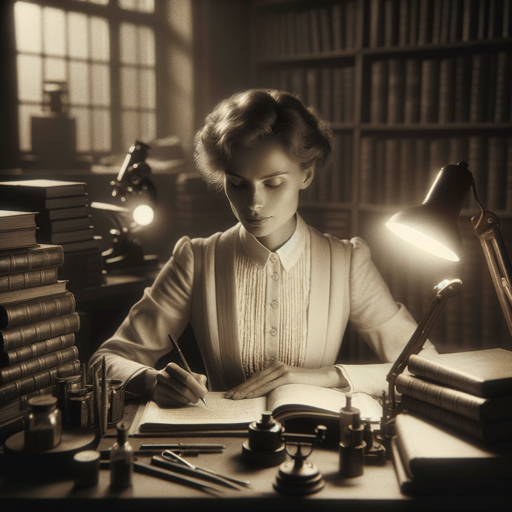

In [8]:
import requests
from openai import OpenAI
from io import BytesIO
from PIL import Image

# 1. Prompt
prompt = "[Foto Leah Goldberg] as a 30 year old female scientist, sitting proud behind a desk with books, writing, illuminated by a small lamp, leica style from 1933, film gain --s 250 --v 6.1"

# 2. Model
client = OpenAI()
model_name = "dall-e-3"
response = client.images.generate(model=model_name, prompt=prompt, size="1024x1024", quality="hd", n=1)
img = Image.open(BytesIO(requests.get(response.data[0].url).content))

# Bild speichern
filename = f"bild_{0}.png"
img.save(filename)
print(f"Gespeichert: {filename}")

# Bildgröße anpassen und anzeigen
display_size = (512, 512)
img_resized = img.resize(display_size)
display(img_resized)

**Erläuterung:**

`BytesIO` ist ein dateiähnliches Objekt, das Daten im Speicher statt auf der Festplatte hält. Es verhält sich wie eine Datei, aber alles passiert im Arbeitsspeicher.


# 4 | Bildklassifizierung
---

Die Bildklassifizierung ist eine grundlegende Aufgabe in der Computer Vision, bei der einem gesamten Bild eine einzige Kategorie (Klasse) zugewiesen wird.

**Wie funktioniert Bildklassifizierung?**
+ Eingabe: Ein einzelnes Bild wird als Eingabe verwendet.
+ Merkmalsextraktion: Ein neuronales Netzwerk analysiert das Bild und extrahiert relevante Merkmale (z. B. Kanten, Farben, Formen, Muster).
+ Klassifizierung: Das Modell ordnet das Bild einer vordefinierten Kategorie zu, z. B. "Hund", "Katze" oder "Auto".
+ Ausgabe: Eine einzige Klasse (Label) mit einer Wahrscheinlichkeitsbewertung wird zurückgegeben.


Beispiel für Bildklassifizierung
Stelle dir vor, du hast ein Bild von einem Hund. Ein Bildklassifizierungsmodell verarbeitet das Bild und gibt die Kategorie "Hund" mit einer bestimmten Wahrscheinlichkeit (z. B. 95 %) zurück.

+ Eingabebild: Ein Bild eines Hundes
+ Modell-Ausgabe: "Hund" (95%)

Falls das Bild eine Katze zeigt, gibt das Modell möglicherweise "Katze" (90%) als Ergebnis zurück.

**Einschränkungen der Bildklassifizierung**     
Das Modell kann nur eine Klasse pro Bild erkennen, auch wenn mehrere Objekte im Bild vorhanden sind.
Es gibt keine Information über die Position oder Anzahl der Objekte im Bild.
Anwendungsfälle für Bildklassifizierung
+ Erkennung von medizinischen Anomalien (z. B. Klassifikation von Röntgenbildern)
+ Identifikation von Pflanzen oder Tieren anhand von Bildern
+ Sentiment-Analyse anhand von Gesichtsmerkmalen

**Bekannte Modelle für Bildklassifizierung**    
+ CNNs (Convolutional Neural Networks) wie ResNet, VGG, EfficientNet
+ Pretrained Modelle: MobileNet, Inception, AlexNet

Das Modell **google/vit-base-patch16-224** ist ein Vision Transformer (ViT) Modell, das von Google entwickelt wurde und sich auf Bildklassifizierungsaufgaben spezialisiert hat. Es gehört zur Familie der Transformer-Modelle, die ursprünglich für die Verarbeitung natürlicher Sprache (NLP) konzipiert wurden, aber hier auf visuelle Daten angewendet werden.

In [ ]:
from transformers import pipeline
from IPython.display import Image
from google.colab import files

classifier = pipeline("image-classification", model="google/vit-base-patch16-224")
# Datei-Auswahldialog öffnen
uploaded = files.upload()

# Dateinamen abrufen (das erste hochgeladene Bild) und ausgeben
image_path = list(uploaded.keys())[0]
display(Image(image_path))

# Klassifizierung
classifier(image_path)




Man kann allerdings auch gpt-4o-mini mit einem entsprechenden Prompt hierzu einsetzen.

In [ ]:
import base64
from openai import OpenAI
from google.colab import files
from IPython.display import Image, display, Markdown

client = OpenAI()

# Datei-Auswahldialog öffnen
uploaded = files.upload()

# Dateinamen abrufen (das erste hochgeladene Bild)
image_path = list(uploaded.keys())[0]

# Bild in Base64 kodieren
encoded_image = base64.b64encode(uploaded[image_path]).decode("utf-8")

prompt_text = "Was ist auf diesem Bild abgebildet? Nennen nur das wesentliche Objekt."
image_url = f"data:image/jpeg;base64,{encoded_image}"

messages = [{
    "role": "user",
    "content": [
        {"type": "text", "text": prompt_text},
        {"type": "image_url", "image_url": {"url": image_url}}
    ]
}]

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=messages,
    max_tokens=300,
)

print(response.choices[0].message.content)

# Bild in Colab anzeigen mit begrenzter Größe
display(Image(uploaded[image_path], width=500))  # Höhe wird proportional angepasst

**Hinweis zu Base64-Kodierung:**




Wann braucht man **keine** Base64-Kodierung?

✅ Wenn man eine **öffentlich zugängliche URL** (z. B. von einem Webserver, CDN oder GitHub) übergibt.     
❌ Wenn man das Bild **lokal hochgeladen hat** (z. B. über ein Gradio-Interface oder Web-Upload) und es **noch nicht online verfügbar** ist.




Fazit:

* 📁 **Lokale Datei** → **Base64 + `data:`-URL**
* 🌐 **Online-URL** → **keine Base64 nötig**



# 5 | Inpainting
---

Inpainting ist eine Technik im Bereich der künstlichen Intelligenz und Bildverarbeitung, bei der bestimmte Teile eines Bildes automatisch ergänzt oder repariert werden. Die Technik wird eingesetzt, um:

+ Beschädigte Bereiche in Bildern zu rekonstruieren
+ Unerwünschte Objekte aus Bildern zu entfernen
+ Fehlende Teile in Bildern zu ergänzen

**Inpainting mit Maske:**   
Bei Inpainting mit Masken geht es darum, genau zu definieren, welche Bereiche eines Bildes rekonstruiert werden sollen. Die Maske ist dabei ein Schlüsselelement, das dem Algorithmus mitteilt, wo er arbeiten soll. Eine Maske ist ein Binärbild (Schwarz-Weiß-Bild), das die gleichen Dimensionen wie das Originalbild hat:

+ Weiße Bereiche (255): Zeigen an, welche Teile des Bildes rekonstruiert/gefüllt werden sollen
+ Schwarze Bereiche (0): Zeigen an, welche Teile des Originalbildes erhalten bleiben sollen

<p><font color='black' size="5">
Modell/API-Übersicht
</font></p>

| Modell / Anbieter         | API-Zugang möglich? | Hinweise |
| :------------------------| :------------------ | :------- |
| **Picsart Outpainting**   | Ja                 | Outpainting-Service per API, gezieltes Erweitern oder Ersetzen von Bildbereichen. Auch Inpainting-Funktion verfügbar. |
| **IOPaint**               | Nein (Web-App & Open Source) | Open-Source-Tool für Inpainting/Outpainting, lokal oder selbst gehostet, keine öffentliche API dokumentiert. Unterstützt verschiedene KI-Modelle, WebUI verfügbar. |
| **Recraft**               | Nein (Web-App)     | KI-Inpainting und Outpainting mit hoher Präzision, Fokus auf kreatives Editing, keine öffentliche API dokumentiert. |
| **Flux Tools (Black Forest Lab)** | Nein (ComfyUI-Workflow) | Inpainting & Outpainting im ComfyUI-Workflow, leistungsstarke „Fill“-Modelle, keine eigenständige API, Integration über ComfyUI möglich. |
| **Amazon Bedrock (SDXL, Titan Image Generator)** | Ja | Text-geführtes Inpainting & Outpainting per API, unterstützt Stable Diffusion XL und Titan Image Generator, flexible Integration, keine Infrastrukturverwaltung nötig. |
| **Google Vertex AI (Imagen 2)** | Ja | Inpainting (Objekte einfügen/entfernen) per API, Outpainting-Funktion für Bildbereichserweiterung, Integration in Vertex AI Generative AI Studio. |
| **OpenAI DALL·E**         | Ja                 | Inpainting („Edit“-Funktion) und Outpainting per API und Web-App, natürliche Sprachsteuerung, nahtlose Bildbearbeitung und Erweiterung. |


[Inpainting](https://huggingface.co/docs/diffusers/using-diffusers/inpaint)

**API-Inpainting - folgt**

![My Image](https://raw.githubusercontent.com/ralf-42/Image/main/under_construction_dall_e_klein.png)

**Prompt ChatGPT** `gpt-5`
```
Ersetze den weiblichen Kopf des Cyborgs durch einen männlichen Kopf.
```



<p><font color='black' size="4">
Original & Inpainting
</font></p>

<img src="https://raw.githubusercontent.com/ralf-42/Image/main/hedra_avatar_klein.jpg" width="207" alt="Avatar">
<img src="https://raw.githubusercontent.com/ralf-42/Image/main/hedra_avatar_inpainting.png" width="245" alt="Avatar">

# 6 | Outpainting
---

Outpainting ist eine Technik der Bildbearbeitung und KI-gestützten Bildgenerierung, bei der ein vorhandenes Bild über seine ursprünglichen Grenzen hinaus erweitert wird. Dabei werden neue Bildinhalte an den Rändern ergänzt, die stilistisch und thematisch zum Original passen. Outpainting wird häufig verwendet, um Bilder zu vergrößern, Hintergründe zu erweitern oder kreative Kompositionen zu schaffen. Moderne Methoden basieren oft auf neuronalen Netzwerken wie Stable Diffusion, die mithilfe von Textbeschreibungen (Prompts) realistische und kohärente Bildbereiche hinzufügen können. So entsteht ein nahtlos erweitertes Bild, das über das ursprüngliche Motiv hinausgeht.

<p><font color='black' size="5">
Modell/API-Übersicht
</font></p>

| Modell / Anbieter         | API-Zugang möglich? | Hinweise |
| :------------------------| :------------------ | :------- |
| **Picsart Outpainting**   | Ja                 | Outpainting-Service per API, gezieltes Erweitern oder Ersetzen von Bildbereichen. Auch Inpainting-Funktion verfügbar. |
| **IOPaint**               | Nein (Web-App & Open Source) | Open-Source-Tool für Inpainting/Outpainting, lokal oder selbst gehostet, keine öffentliche API dokumentiert. Unterstützt verschiedene KI-Modelle, WebUI verfügbar. |
| **Recraft**               | Nein (Web-App)     | KI-Inpainting und Outpainting mit hoher Präzision, Fokus auf kreatives Editing, keine öffentliche API dokumentiert. |
| **Flux Tools (Black Forest Lab)** | Nein (ComfyUI-Workflow) | Inpainting & Outpainting im ComfyUI-Workflow, leistungsstarke „Fill“-Modelle, keine eigenständige API, Integration über ComfyUI möglich. |
| **Amazon Bedrock (SDXL, Titan Image Generator)** | Ja | Text-geführtes Inpainting & Outpainting per API, unterstützt Stable Diffusion XL und Titan Image Generator, flexible Integration, keine Infrastrukturverwaltung nötig. |
| **Google Vertex AI (Imagen 2)** | Ja | Inpainting (Objekte einfügen/entfernen) per API, Outpainting-Funktion für Bildbereichserweiterung, Integration in Vertex AI Generative AI Studio. |
| **OpenAI DALL·E**         | Ja                 | Inpainting („Edit“-Funktion) und Outpainting per API und Web-App, natürliche Sprachsteuerung, nahtlose Bildbearbeitung und Erweiterung. |


**API-Outpainting - folgt**

![My Image](https://raw.githubusercontent.com/ralf-42/Image/main/under_construction_dall_e_klein.png)

**Prompt ChatGPT** `gpt-4o`
```
Erweitere das Bild sinnvoll über die aktuellen Bild Grenzen - Outpainting. Neues Format 16:9
```



<p><font color='black' size="4">
Original & Outpainting
</font></p>

<img src="https://raw.githubusercontent.com/ralf-42/Image/main/hedra_avatar_klein.jpg" width="207" alt="Avatar">
<img src="https://raw.githubusercontent.com/ralf-42/Image/main/hedra_avatar_outpainting_klein.png" width="551" alt="Avatar">


# 7 | Objekterkennung
---

Die Objekterkennung geht einen Schritt weiter als die Bildklassifizierung. Hier wird nicht nur bestimmt, welche Objekte in einem Bild vorhanden sind, sondern auch wo sie sich befinden.

**Wie funktioniert Objekterkennung?**   
+ Eingabe: Ein einzelnes Bild wird als Eingabe verwendet.
+ Merkmalsextraktion & Vorschläge für Regionen: Das Modell analysiert das Bild und identifiziert potenzielle Bereiche, in denen sich Objekte befinden könnten.
+ Klassifizierung & Lokalisierung: Jedes erkannte Objekt wird einer bestimmten Klasse zugeordnet, und die Position wird durch eine Bounding Box (ein rechteckiger Bereich um das Objekt) beschrieben.
+ Ausgabe: Eine Liste mit allen erkannten Objekten, ihrer Klasse und ihrer Position im Bild wird zurückgegeben.


**Beispiel für Objekterkennung**    
Stelle dir vor, du hast ein Bild mit einem Hund, einer Katze und einem Auto. Ein Objekterkennungsmodell kann alle drei Objekte gleichzeitig identifizieren und ihre Positionen angeben.

+ Eingabebild: Ein Bild mit einem Hund, einer Katze und einem Auto
+ Modell-Ausgabe:
>Hund (95%) - Position: (x1, y1, x2, y2)   
Katze (90%) - Position: (x3, y3, x4, y4)   
Auto (99%) - Position: (x5, y5, x6, y6)   

Hierbei sind (x1, y1, x2, y2) die Koordinaten der Bounding Box für den Hund, (x3, y3, x4, y4) für die Katze usw.

**Einschränkungen der Objekterkennung**   
Aufwendigere Berechnungen im Vergleich zur einfachen Bildklassifizierung.
Schwieriger zu trainieren, da genaue Positionen für Trainingsdaten erforderlich sind.
Anwendungsfälle für Objekterkennung
+ Autonomes Fahren (Erkennung von Fußgängern, Verkehrsschildern)
+ Überwachungssysteme (Erkennen von Eindringlingen oder gefährlichen Objekten)
+ Analyse von Bildern im Einzelhandel (z. B. automatische Produktzählung in Regalen)

**Bekannte Modelle für Objekterkennung**   
+ YOLO (You Only Look Once) – sehr schnell und effizient
+ Faster R-CNN – präzise, aber langsamer
+ SSD (Single Shot MultiBox Detector) – guter Kompromiss zwischen Geschwindigkeit und Genauigkeit

<p><font color='black' size="5">
YOLO
</font></p>

**YOLO (You Only Look Once)** ist ein leistungsfähiger Algorithmus für die Objekterkennung in Bildern und Videos mithilfe künstlicher Intelligenz (KI). Es handelt sich um ein Modell, das auf Convolutional Neural Networks (CNN) basiert und sich durch seine Geschwindigkeit und Genauigkeit auszeichnet.

**Funktionsweise**

YOLO teilt ein Bild in ein Gitter auf und verarbeitet es in einem einzigen Durchlauf. Jede Gitterzelle ist für die Erkennung von Objekten in ihrem Bereich verantwortlich. Der Algorithmus sagt gleichzeitig Begrenzungsrahmen (Bounding Boxes) und Klassenwahrscheinlichkeiten für Objekte voraus.

**Vorteile**

1. **Geschwindigkeit**: YOLO kann Bilder in Echtzeit mit bis zu 45 Bildern pro Sekunde verarbeiten, was es ideal für Anwendungen wie Videoüberwachung oder autonomes Fahren macht.

2. **Genauigkeit**: Trotz seiner Geschwindigkeit erreicht YOLO eine hohe Erkennungsgenauigkeit und weist nur wenige Hintergrundfehler auf.

3. **Verallgemeinerungsfähigkeit**: Neuere Versionen von YOLO bieten eine verbesserte Leistung bei der Erkennung von Objekten in neuen Umgebungen.

**Entwicklung**

Seit seiner Einführung im Jahr 2015 hat YOLO mehrere Iterationen durchlaufen, wobei jede Version Verbesserungen und Optimierungen mit sich brachte. Die neueste Version ist YOLO v7, die weitere Fortschritte in Bezug auf Geschwindigkeit und Genauigkeit bietet.

YOLO hat die Objekterkennung revolutioniert und findet Anwendung in verschiedenen Bereichen wie autonomen Fahrzeugen, Überwachungssystemen, Robotik und generativer KI.



[Ultralytics | YOLO](https://www.ultralytics.com/de)

Der Code verwendet die Ultralytics YOLOv8 Bibliothek, um Objekterkennung auf einem hochgeladenen Bild durchzuführen. Er lädt ein vortrainiertes YOLOv8m-Modell, ermöglicht das Hochladen eines Bildes über Google Colab, führt die Objekterkennung auf diesem Bild durch (mit einer Konfidenzschwelle von 0.2), speichert das Bild mit den Erkennungsergebnissen und die entsprechenden Textdateien und zeigt schließlich das bearbeitete Bild in der Colab-Ausgabe an.

In [ ]:
# Import
import ultralytics
from ultralytics import YOLO
from google.colab import files
from IPython.display import Image, display, Markdown

# YOLO-Modell laden
model = YOLO("yolov8m.pt")

In [ ]:
# Der Code verarbeitet jpg-Dateien aber keine jpeg-Dateien, nach Anpassung des Datei-Typs keine Fehler.
# Datei-Auswahldialog öffnen
uploaded = files.upload()

# Dateinamen abrufen (das erste hochgeladene Bild)
image_path = list(uploaded.keys())[0]

# YOLO-Vorhersage durchführen
results = model.predict(source=image_path, save=True, conf=0.2, save_txt=True)

# Pfad zum gespeicherten Bild mit den Erkennungen
result_image_path = results[0].save_dir + "/" + image_path

# Bild mit erkannten Objekten anzeigen
display(Image(result_image_path,width=600)) # Höhe wird automatisch angepasst

# 8 | Bildbeschreibung

Die Aufgabe Bildbeschreibung (Image2Text) beschreibt die automatische Generierung von Text aus Bildern mithilfe von Künstlicher Intelligenz (KI). Dabei werden neuronale Netze, insbesondere tiefgehende Modelle in Kombination mit Transformern, genutzt, um visuelle Inhalte zu analysieren und zu beschreiben.

**Anwendungsfälle**    
+ Bildbeschreibung (Image Captioning): Generierung von Textbeschreibungen zu Bildern (z. B. für barrierefreie Webseiten oder Archivierung).
+ Optische Zeichenerkennung (OCR): Extraktion von Text aus Bildern oder gescannten Dokumenten.
+ Visuelle Frage-Antwort-Systeme (Visual Question Answering, VQA): Beantwortung von Fragen zu Bildinhalten.
+ Content-Moderation: Automatische Identifikation und Beschreibung von problematischen oder sensiblen Bildinhalten.

Der Code lädt ein Bild in Google Colab hoch, kodiert es in Base64 und sendet es zusammen mit einer Frage ("Was ist auf dem Bild?") an das OpenAI-Modell "gpt-4o-mini". Die Antwort des Modells (eine detaillierte Beschreibung im Markdown-Format) wird angezeigt, ebenso wie das hochgeladene Bild selbst (mit einer maximalen Breite von 500 Pixeln).


In [ ]:
import base64
from openai import OpenAI
from google.colab import files
from IPython.display import Image, display, Markdown

client = OpenAI()

In [ ]:
# Datei-Auswahldialog öffnen
uploaded = files.upload()

# Dateinamen abrufen (das erste hochgeladene Bild)
image_path = list(uploaded.keys())[0]

# Bild in Base64 kodieren; Bild umzuwandeln, dass es in einem Textformat
# (z. B. JSON) über eine API oder an ein Sprachmodell wie OpenAI GPT gesendet werden kann.
encoded_image = base64.b64encode(uploaded[image_path]).decode("utf-8")

prompt_text = "Was ist auf dem Bild? Erstelle eine ausführliche Beschreibung im Markdown-Format."
image_url = f"data:image/jpeg;base64,{encoded_image}"

messages = [{
    "role": "user",
    "content": [
        {"type": "text", "text": prompt_text},
        {"type": "image_url", "image_url": {"url": image_url}}
    ]
}]

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=messages,
    max_tokens=300,
)

# Bildbeschreibung
display(Markdown(response.choices[0].message.content))

# Bild in Colab anzeigen mit begrenzter Größe
display(Image(uploaded[image_path], width=500))  # Höhe wird proportional angepasst


# A | Aufgabe
---

Bereit für eine neue Herausforderung? In diesen Aufgaben werden Sie die leistungsstarken Vision-Modelle von **MediaPipe** kennenlernen. Mit diesen Modellen können sie u.a. Objekterkennung, Handgesten und Gesichtsausdrücke in Echtzeit analysieren. Entdecken Sie die Potenziale der GenAI. Die Aufgabestellungen unten bieten weitere Anregungen, Sie können aber auch gerne eine andere Herausforderung angehen.

[MediaPipe](https://mediapipe-studio.webapps.google.com/home)

[MediaPipe Lösungsleitfaden](https://ai.google.dev/edge/mediapipe/solutions/guide?hl=de)

<p><font color='black' size="5">
Coverbild LLM-Buch
</font></p>

In einem früheren Modul wurde ein LLM-basierten Buchgenerator erstellt, der die Erstellung eines Buches von Anfang bis Ende automatisiert. Dieser Prozess umfasste die Erstellung einer Zusammenfassung, die Gliederung des Inhaltsverzeichnisses und das iterative Schreiben der Kapitel in ein strukturiertes Markdown-Dokument. Jetzt wird diese Arbeit erweitert: Erstellen Sie mit DALL·E ein Coverbild für das Buch, das den textbasierten Inhalt ergänzt.

